# Aula - Ciência de Dados - Informática - 2º Ano ADM
Prof. Eduardo Camargo de Siqueira

## Introdução

### Como funciona a Ciência de Dados?

A Ciência de Dados envolve diversas etapas, desde a coleta e o armazenamento de dados até a análise e a visualização dos resultados. Algumas das etapas mais importantes incluem:

1. **Coleta de dados:** Nesta etapa, os dados são coletados a partir de diferentes fontes, como sensores, bancos de dados, APIs, entre outros.
2. **Limpeza de dados:** Os dados coletados geralmente têm problemas como erros, valores faltantes e outros problemas que precisam ser corrigidos antes de serem analisados.
3. **Análise exploratória de dados:** Nesta etapa, os dados são visualizados e analisados para se obter uma melhor compreensão do que está acontecendo.
4. **Modelagem de dados:** Os dados são modelados para se obter um melhor entendimento do comportamento dos dados e para se criar modelos preditivos.
5. **Visualização de dados:** Os dados são visualizados em gráficos e outras formas para ajudar a entender melhor os resultados e comunicar *insights* para outras pessoas.

## 1. Coleta de Dados

*   Coletamos um dataset do Kaggle (*popular_10000_movies_tmdb*) - Disponivel em: https://gitlab.com/ecsiqueira35/codigos-fonte/-/raw/main/informatica/datasets/popularmovies2023.csv ;
* Usaremos a biblioteca *pandas* para carregar os dados no *Python*.



In [ ]:
# Importar a biblioteca pandas
import pandas as pd

# Guardar a url do dataset
url = "https://gitlab.com/ecsiqueira35/codigos-fonte/-/raw/main/informatica/datasets/popularmovies2023.csv"

# Carregar o dataset
filmes = pd.read_csv(url)

# Mostrar 5 linhas do dataset
filmes.sample(5)


id                                     title release_date  \
6057    4964                                Knocked Up   2007-06-01   
1998  183392                          Capturing Avatar   2010-11-16   
2881  324670                                  Spectral   2016-12-09   
3157  491418                            Instant Family   2018-11-16   
2853  921145  Road to Wadesboro- Evil Dead 2 Locations          NaN   

                                         genres original_language  \
6057             ['Comedy', 'Romance', 'Drama']           English   
1998                            ['Documentary']           English   
2881  ['Science Fiction', 'Thriller', 'Action']           English   
3157                                 ['Comedy']           English   
2853                                 ['Horror']            German   

      vote_average  vote_count  popularity  \
6057           6.3        3556      15.681   
1998           7.7          62      31.490   
2881           6.4        1499      35.690   
3157           7.6        2569      21.488   
2853           6.1           4      21.386   

                                               overview    budget  \
6057  A slacker and a career-driven woman accidental...  30000000   
1998  Capturing Avatar is a feature length behind-th...         0   
2881  A special-ops team is dispatched to fight supe...  70000000   
3157  When Pete and Ellie decide to start a family, ...  48000000   
2853                                                NaN         0   

                                   production_companies    revenue  runtime  \
6057       ['Apatow Productions', 'Universal Pictures']  219922417      129   
1998                                      ['Mob Scene']          0       98   
2881       ['Mid Atlantic Films', 'Legendary Pictures']          0      109   
3157  ['Closest to the Hole Productions', 'Leverage ...  120989656      118   
2853                                                 []          0        0   

                                                tagline  
6057                                 Save the due date.  
1998                                                NaN  
2881                                                NaN  
3157  Just add chaos, laughter, awkwardness, mistake...  
2853                                                NaN

In [ ]:
# Mostrar o shape do dataset
filmes.shape

(10000, 14)

## 2. Limpeza de dados

*   Removeremos as colunas desnecessárias;
* Prepararemos os dados para o processamento.

In [ ]:
# Remover colunas desnecessárias
filmes = filmes.drop( columns=['vote_average', 'vote_count', 'budget', 'production_companies', 'revenue', 'runtime', 'tagline'] )

# Mostrar 5 linhas do dataset
filmes.sample(5)

id               title release_date  \
8400   10533  The Scarlet Letter   1995-10-13   
9569  428446         Walking Out   2017-01-21   
3976   11474        The Warriors   1979-02-09   
9959  706510          Desperados   2020-07-01   
1338  132232                Mama   2013-01-17   

                                  genres original_language  popularity  \
8400     ['Drama', 'Romance', 'Western']           English      11.222   
9569  ['Adventure', 'Drama', 'Thriller']           English      10.574   
3976              ['Action', 'Thriller']           English      24.706   
9959               ['Comedy', 'Romance']           English      10.538   
1338                          ['Horror']           English      38.422   

                                               overview  
8400  Set in puritanical Boston in the mid 1600s, th...  
9569  A city teen travels to Montana to go hunting w...  
3976  Prominent gang leader Cyrus calls a meeting of...  
9959  A panicked young woman and her two best friend...  
1338  Guillermo del Toro presents Mama, a supernatur...

In [ ]:
# Remover dados com coluna 'overview' vazio
filmes = filmes.dropna(subset=["overview"])

# Transformar coluna 'overview' em dado de texto
filmes['overview'] = filmes['overview'].astype(str)

# Mostrar o shape do dataset
filmes.shape

(9923, 7)

In [ ]:
generos = []

for i, row in filmes.iterrows():
  gen = row['genres'].replace('[', '')
  gen = gen.replace(']', '')
  gen = gen.replace(' ', '')

  generos.append(gen)

filmes['genres'] = generos

# Mostrar 5 linhas do dataset
filmes.sample(5)

id                   title release_date  \
3477    9763                   Goal!   2005-09-29   
714   225886                Sex Tape   2014-07-17   
8156    8923  Green Street Hooligans   2005-09-09   
2431  262504               Allegiant   2016-03-09   
8305   10861            Maximum Risk   1996-09-13   

                                               genres original_language  \
3477                                          'Drama'           English   
714                                          'Comedy'           English   
8156                                  'Crime','Drama'           English   
2431  'Adventure','ScienceFiction','Action','Mystery'           English   
8305                              'Action','Thriller'           English   

      popularity                                           overview  
3477      20.498  Like millions of kids around the world, Santia...  
714       58.584  When Jay and Annie first got together, their r...  
8156      14.210  After being wrongfully expelled from Harvard U...  
2431      25.339  Beatrice Prior and Tobias Eaton venture into t...  
8305      12.989  Alain Moreau's investigation into the death of...

## 3. Análise exploratória



*   Vamos ordenar os filmes por popularidade;
*   Guardar os 20 filmes mais populares;
*   Plotar um gráfico de popularidade;
*   Separar os filmes de língua portuguesa;
*   [Opcional] Analisar a volumetria dos gêneros;
*   [Opcional] Mostrar a núvem de palavras.



In [ ]:
# Ordenar o dataset pela coluna 'popularity'
filmes_ordenados = filmes.sort_values(['popularity'], ascending=False)

# Separar os 20 filmes mais populares
filmes_populares = filmes_ordenados.head(20)

filmes_populares

id                                              title release_date  \
0    758323                                The Pope's Exorcist   2023-04-05   
1    640146                  Ant-Man and the Wasp: Quantumania   2023-02-15   
2    502356                        The Super Mario Bros. Movie   2023-04-05   
3    868759                                            Ghosted   2023-04-18   
4    594767                           Shazam! Fury of the Gods   2023-03-15   
6    447365                   Guardians of the Galaxy Volume 3   2023-05-03   
5     76600                           Avatar: The Way of Water   2022-12-14   
8    677179                                          Creed III   2023-03-01   
7    934433                                          Scream VI   2023-03-08   
9    493529            Dungeons & Dragons: Honor Among Thieves   2023-03-23   
10   948713             The Last Kingdom: Seven Kings Must Die   2023-04-14   
17  1102776                                                AKA   2023-04-28   
11   420808                                  Peter Pan & Wendy   2023-04-20   
12   603692                               John Wick: Chapter 4   2023-03-22   
13   713704                                     Evil Dead Rise   2023-04-12   
15   315162                       Puss in Boots: The Last Wish   2022-12-07   
16   638974                                   Murder Mystery 2   2023-03-28   
14   804150                                       Cocaine Bear   2023-02-22   
18   946310  Pirates Down the Street II: The Ninjas from Ac...   2022-04-20   
23   385687                                             Fast X   2023-05-17   

                                               genres original_language  \
0                       'Horror','Mystery','Thriller'           English   
1               'Action','Adventure','ScienceFiction'           English   
2   'Animation','Adventure','Family','Fantasy','Co...           English   
3                         'Action','Comedy','Romance'           English   
4             'Action','Comedy','Fantasy','Adventure'           English   
6               'ScienceFiction','Adventure','Action'           English   
5               'ScienceFiction','Adventure','Action'           English   
8                                    'Drama','Action'           English   
7                       'Horror','Mystery','Thriller'           English   
9                      'Adventure','Fantasy','Comedy'           English   
10       'Action','Adventure','History','Drama','War'           English   
17                        'Thriller','Action','Crime'            French   
11            'Family','Fantasy','Action','Adventure'           English   
12                        'Action','Thriller','Crime'           English   
13                                           'Horror'           English   
15  'Animation','Family','Fantasy','Adventure','Co...           English   
16                                   'Comedy','Crime'           English   
14                        'Thriller','Comedy','Crime'           English   
18                      'Family','Action','Adventure'             Dutch   
23                        'Action','Crime','Thriller'           English   

    popularity                                           overview  
0     5089.969  Father Gabriele Amorth, Chief Exorcist of the ...  
1     4665.438  Super-Hero partners Scott Lang and Hope van Dy...  
2     3935.550  While working underground to fix a water main,...  
3     2791.532  Salt-of-the-earth Cole falls head over heels f...  
4     2702.593  Billy Batson and his foster siblings, who tran...  
6     2520.308  Peter Quill, still reeling from the loss of Ga...  
5     2280.912  Set more than a decade after the events of the...  
8     1894.044  After dominating the boxing world, Adonis Cree...  
7     1862.283  Following the latest Ghostface killings, the f...  
9     1655.052  A charming thief and a band of unlikely advent...  
10    1436.725  In the wa

In [ ]:
# Importar biblioteca plotly
import plotly.express as px

# Gerar o gráfico
grafico = px.bar(filmes_populares, x="title", y="popularity")

# Mostrar o gráfico
grafico.show()

In [ ]:
# Filtrar filmes de lingua portuguesa
filmes_pt = filmes[ filmes["original_language"] == "Portuguese" ]

# Mostrar o shape do dataset
filmes_pt

id                                  title release_date  \
1049    54989                     Love, Strange Love   1982-01-11   
1298   197158                                  Porno   1981-01-01   
1991     7347                            Elite Squad   2007-10-12   
2327   372519        The Ten Commandments: The Movie   2016-01-28   
2467   962232                    Beyond the Universe   2022-10-27   
2554   502581                        Nothing to Lose   2018-03-29   
2662      598                            City of God   2002-08-30   
3340    47931          Elite Squad: The Enemy Within   2010-10-08   
3559  1008204             Alice no Mundo da Internet   2022-08-05   
3673   785976                                   Pelé   2021-02-23   
3859  1022206                       Someone Borrowed   2022-10-11   
4044   249578                                   Tabu   1983-03-10   
4452   785538                            7 Prisoners   2021-10-22   
4547   755339                 Just Another Christmas   2020-12-03   
5367   232771  Promiscuity, the Street Kids of Katia   1984-04-30   
5588  1092193                       Have a Nice Day!   2023-03-10   
5718   580077               Nothing to Lose - Part 2   2019-08-15   
6015   786705       Confessions of an Invisible Girl   2021-09-22   
6196   818502                              Fenced In   2022-09-01   
6461   779202                              Insensate   2021-08-04   
6745   348543                            Real Beleza   2015-07-13   
6923   553608                          Cinderela Pop   2019-02-28   
7639   661595                        Yakuza Princess   2021-08-26   
7864  1042984                Christmas Full of Grace   2022-11-30   
8258    58235   Confessions of a Brazilian Call Girl   2011-02-25   
8882   758510                                A Gruta   2020-10-29   
9766   840439                Journey with Tarsilinha   2022-03-17   
9847   612304           Divaldo: O Mensageiro da Paz   2019-09-12   
9938   613868                                Cousins   2019-12-10   

                                          genres original_language  \
1049                           'Drama','History'        Portuguese   
1298                                     'Drama'        Portuguese   
1991                    'Drama','Action','Crime'        Portuguese   
2327                                     'Drama'        Portuguese   
2467                           'Romance','Drama'        Portuguese   
2554                           'Drama','History'        Portuguese   
2662                             'Drama','Crime'        Portuguese   
3340                    'Drama','Action','Crime'        Portuguese   
3559              'Adventure','Fantasy','Family'        Portuguese   
3673                               'Documentary'        Portuguese   
3859                          'Comedy','Romance'        Portuguese   
4044                                                    Portuguese   
4452                                     'Drama'        Portuguese   
4547                   'Comedy','Family','Drama'        Portuguese   
5367                                     'Drama'        Portuguese   
5588                            'Comedy','Drama'        Portuguese   
5718                                     'Drama'        Portuguese   
6015                            'Comedy','Drama'        Portuguese   
6196                                    'Comedy'        Portuguese   
6461               'Mystery','Horror','Thriller'        Portuguese   
6745                                     'Drama'        Portuguese   
6923                          'Romance','Comedy'        Portuguese   
7639                         'Action','Thriller'        Portuguese   
7864                          'Romance','Comedy'        Portuguese   
8258                                     'Drama'        Portuguese   
8882                                    'Horror'        Portuguese   
9766  'Animation','Adventure','Family','Fantasy'  

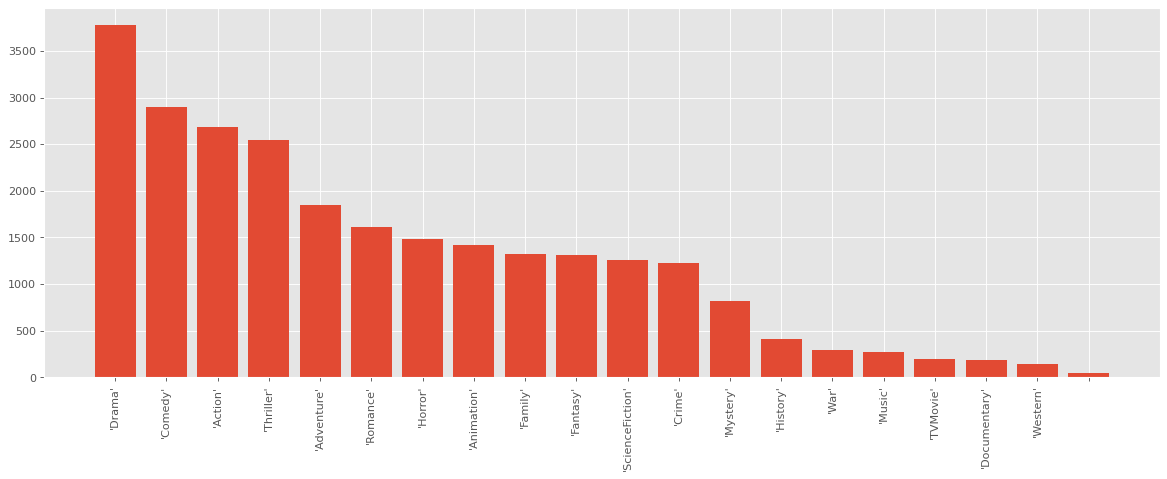

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict

plt.style.use('ggplot')

def plot_generos(df=filmes, num=50):
    generos = []
    for i, rows in df.iterrows():
      generos+=rows['genres'].split(',')

    counter_object = Counter(generos)
    srt_dct = dict(sorted(counter_object.items(), key=lambda item: item[1], reverse=True))
    keys = list(srt_dct.keys())[:num]
    num_values = list(srt_dct.values())[:num]

    plt.figure(figsize=(18, 6), dpi=80)
    plt.bar(keys, num_values)
    plt.xticks(rotation=90)
    plt.show()

plot_generos(filmes)

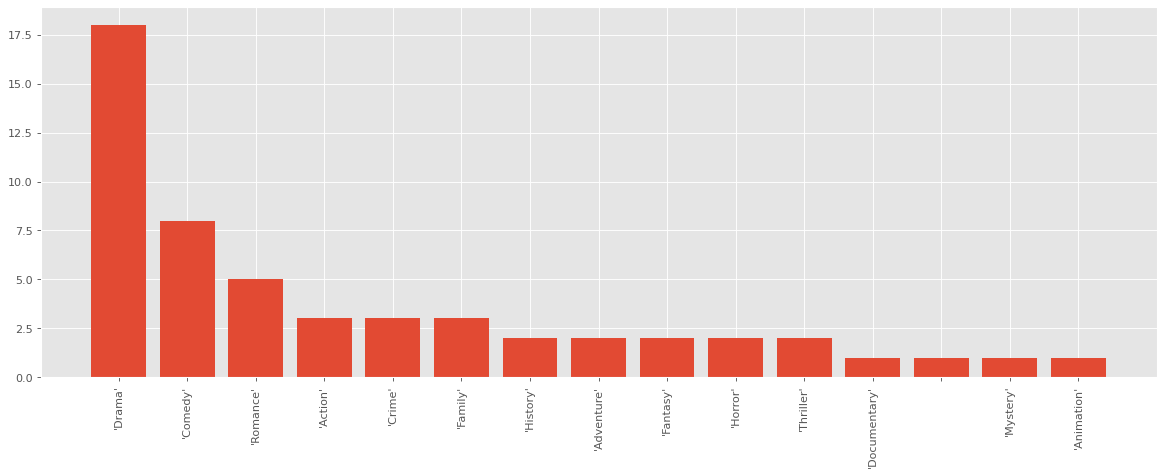

In [ ]:
plot_generos(filmes_pt)

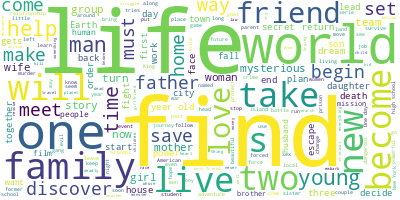

In [ ]:
# Importar a biblioteca wordcloud
from wordcloud import WordCloud

# Juntar toda coluna 'overview'
long_string = ','.join(list(filmes['overview'].values))

# Criar o objeto WordCloud
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Gerar núvem de palavras
wordcloud.generate(long_string)

# Mostrar núvem de palavras
wordcloud.to_image()

## 4. Modelagem de dados

In [ ]:
# Importar biblioteca de expressão regular
import re

# Remover pontuação
filmes['overview'] = filmes['overview'].map(lambda x: re.sub('[,\.!?]', '', x))

# Converter para caixa baixa
filmes['overview'] = filmes['overview'].map(lambda x: x.lower())

# Mostrar 5 amostras aleatórias
filmes['overview'].sample(5)

5953    when recently single steven moves into his new...
2892    a woman learns about the death of her orthodox...
8630    invited to a wealthy client's mansion time-tra...
8008    the story of humankind's last stand against a ...
1562    marty and doc are at it again in this wacky se...
Name: overview, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = filmes['overview']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 7, init='k-means++', random_state=0)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=7, random_state=0)

In [ ]:
y_kmeans = kmeans.fit_predict(X)

In [ ]:
filmes['group'] = y_kmeans

filmes.head(5)

id                              title release_date  \
0  758323                The Pope's Exorcist   2023-04-05   
1  640146  Ant-Man and the Wasp: Quantumania   2023-02-15   
2  502356        The Super Mario Bros. Movie   2023-04-05   
3  868759                            Ghosted   2023-04-18   
4  594767           Shazam! Fury of the Gods   2023-03-15   

                                              genres original_language  \
0                      'Horror','Mystery','Thriller'           English   
1              'Action','Adventure','ScienceFiction'           English   
2  'Animation','Adventure','Family','Fantasy','Co...           English   
3                        'Action','Comedy','Romance'           English   
4            'Action','Comedy','Fantasy','Adventure'           English   

   popularity                                           overview  group  
0    5089.969  father gabriele amorth chief exorcist of the v...      6  
1    4665.438  super-hero partners scott lang and hope van dy...      6  
2    3935.550  while working underground to fix a water main ...      6  
3    2791.532  salt-of-the-earth cole falls head over heels f...      5  
4    2702.593  billy batson and his foster siblings who trans...      5

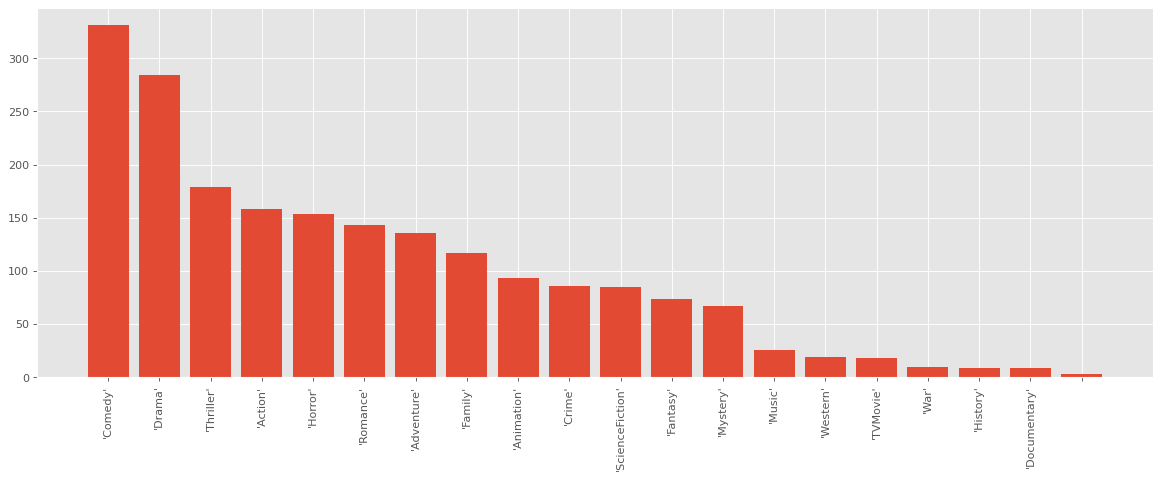

In [ ]:
plot_generos(filmes[ filmes['group'] == 0])

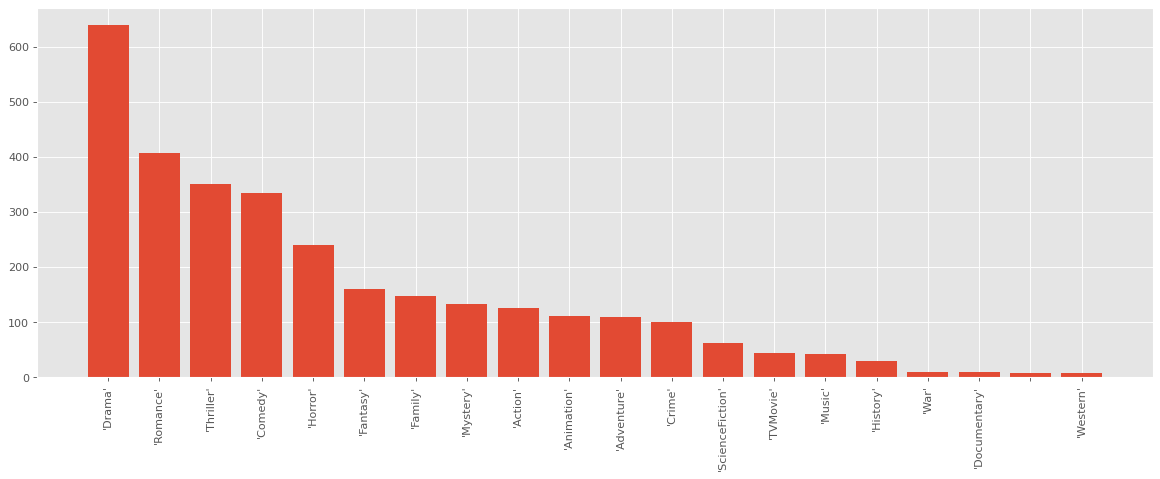

In [ ]:
plot_generos(filmes[ filmes['group'] == 1])

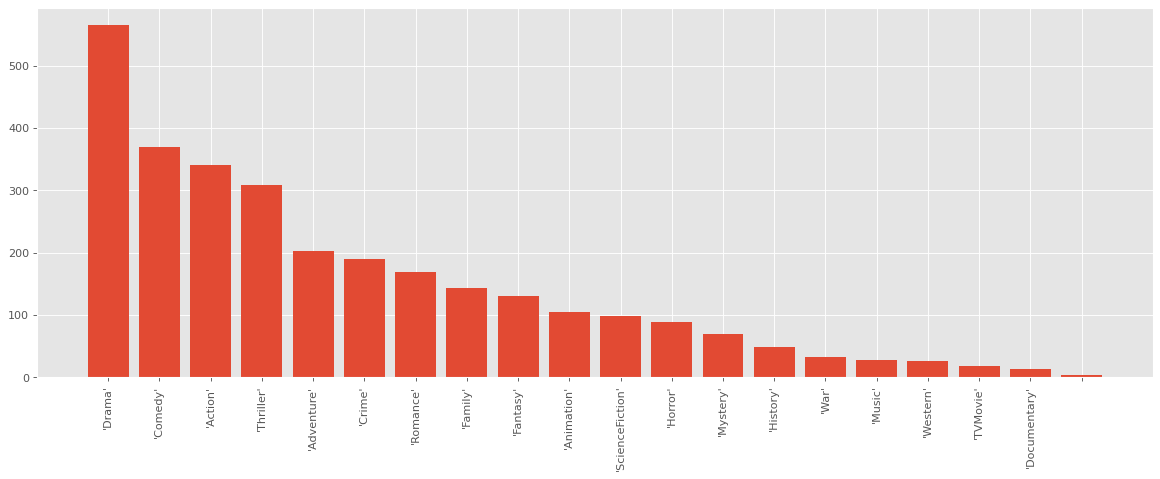

In [ ]:
plot_generos(filmes[ filmes['group'] == 2])

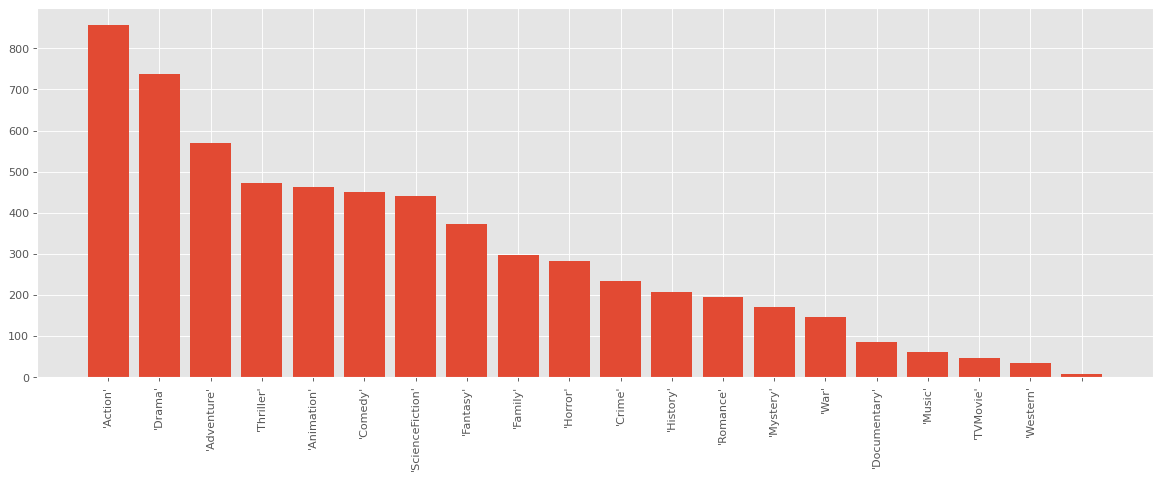

In [ ]:
plot_generos(filmes[ filmes['group'] == 3])

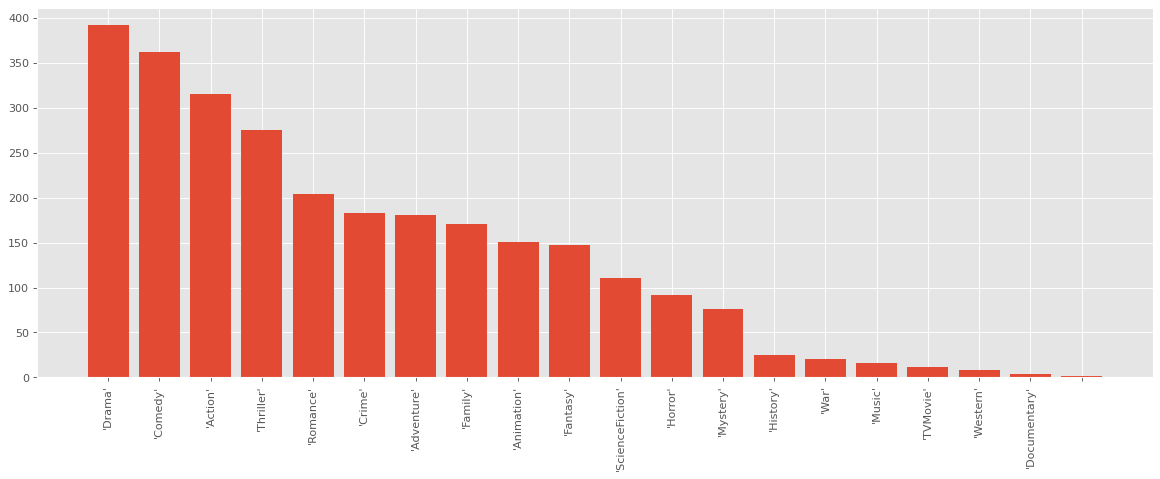

In [ ]:
plot_generos(filmes[ filmes['group'] == 4])

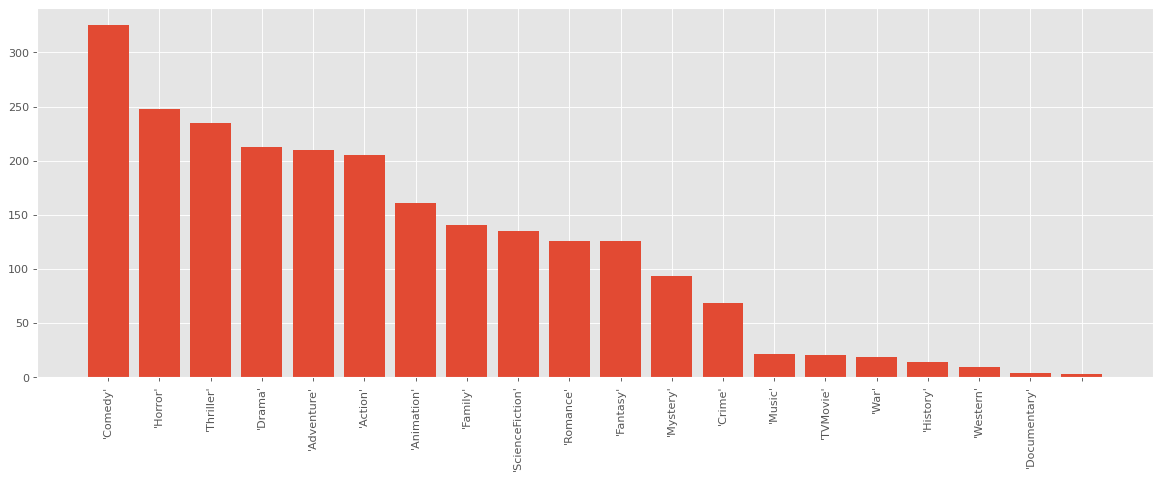

In [ ]:
plot_generos(filmes[ filmes['group'] == 5])

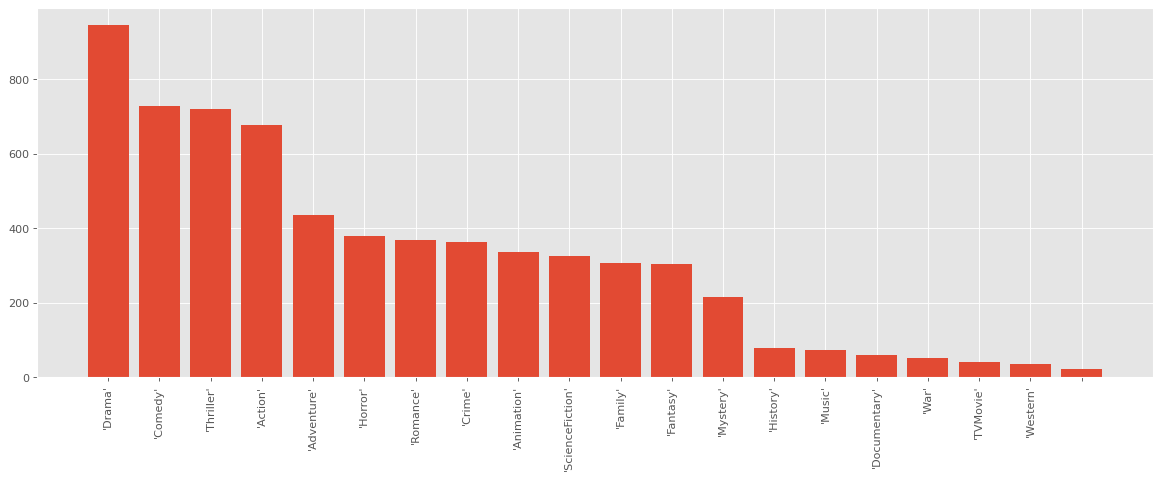

In [ ]:
plot_generos(filmes[ filmes['group'] == 6])